In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv("data/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
df.shape

(303, 14)

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df["chol"].max()

np.int64(564)

In [36]:
df["chol"].min()

np.int64(126)

In [37]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


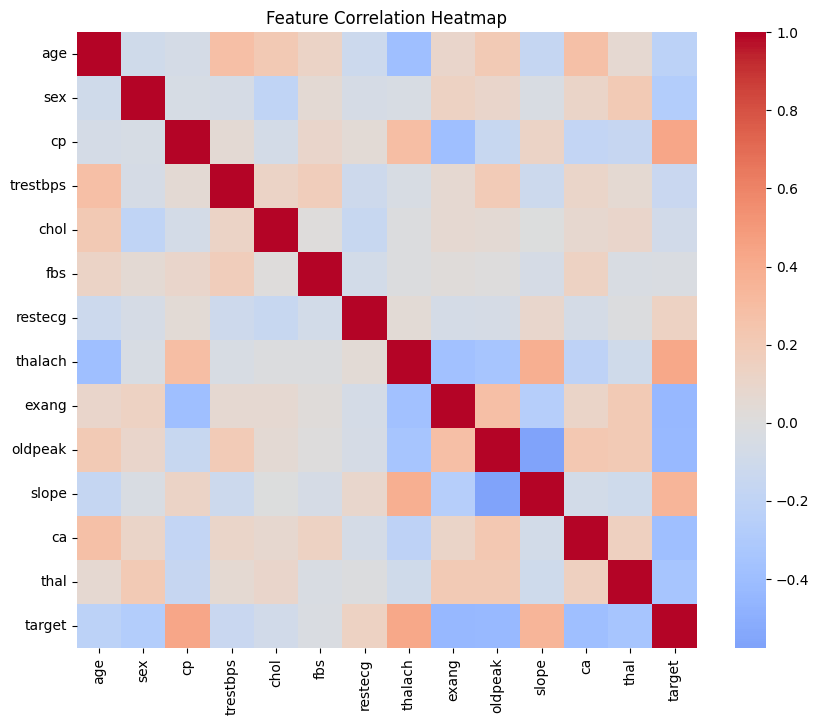

In [38]:

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## Exploratory Data Analysis (EDA)

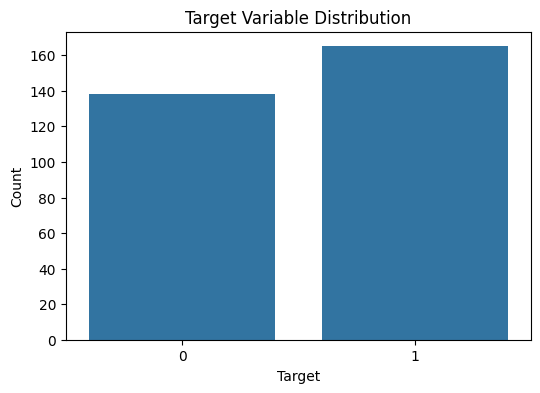

Target value counts:

target
1    165
0    138
Name: count, dtype: int64


In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"])
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()
target_counts = df["target"].value_counts()
print("Target value counts:\n")
print(target_counts)

In [40]:
target_counts = df["target"].value_counts()
total = len(df)

pct_no_disease = round(target_counts.get(0, 0) * 100 / total, 2)
pct_disease = round(target_counts.get(1, 0) * 100 / total, 2)

print(f"Percentage of patients without heart disease: {pct_no_disease}%")
print(f"Percentage of patients with heart disease: {pct_disease}%")


Percentage of patients without heart disease: 45.54%
Percentage of patients with heart disease: 54.46%


In [41]:
df["sex"].unique()

array([1, 0])

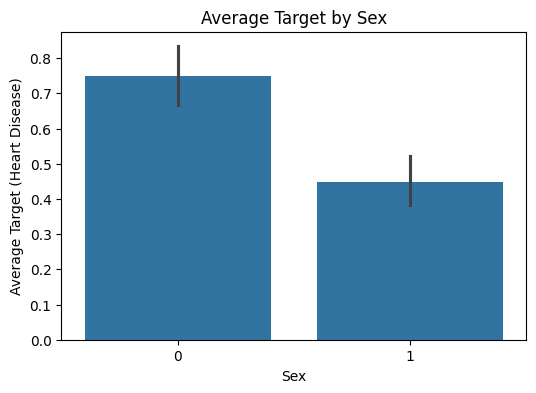

In [42]:
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="target", data=df)
plt.title("Average Target by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Target (Heart Disease)")
plt.show()

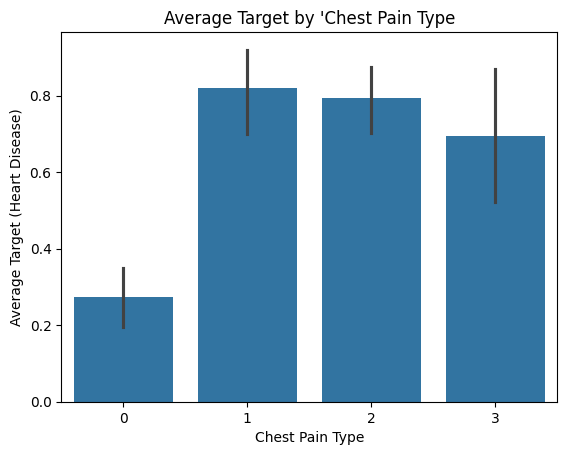

In [43]:
sns.barplot(x="cp", y="target", data=df)
plt.title("Average Target by 'Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Average Target (Heart Disease)")
plt.show()

### Modeling

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:


predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## Train, evaluate & log to MLflow 

### MLflow setup

 mlflow server --host 0.0.0.0  --port 5000 --serve-artifacts

In [47]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
import os
from dotenv import load_dotenv

load_dotenv(".env_streamlit")

True

For the tracking Url you can use the local_url or codespace endpoint . If you use the codespace end point make sure that it is public

In [ ]:
tracking_uri="https://orange-space-halibut-j74q7x57p9x25gv4-5000.app.github.dev:5000"
tracking_uri="http://127.0.0.1:5000"

In [49]:

tracking_uri= os.getenv("MLFLOW_TRACKING_URI", tracking_uri)

In [50]:
experiment_description = (
    "This is the model for heart attack prediction"
)

experiment_tags = {
    "project_name": "Heart Attack",
    "dataset": "heart.csv",
    "team": "MLOps",
    "mlflow.note.content": experiment_description,
}

client = MlflowClient(tracking_uri="tracking_uri")
mlflow.set_tracking_uri("tracking_uri")

/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)


In [51]:
run_name="RandomForestClassifier"
artifact_path = "RandomForestClassifier_heart_disease"

In [52]:
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define different hyperparameter sets for 3 runs
param_sets = [
    {"n_estimators": 100, "max_depth": 8, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 200, "max_depth": 10, "min_samples_split": 5, "min_samples_leaf": 2},
    {"n_estimators": 300, "max_depth": 12, "min_samples_split": 10, "min_samples_leaf": 4},
]

experiment_tags = {
    "project_name": "Heart Attack",
    "dataset": "heart.csv",
    "team": "MLOps",
    "mlflow.note.content": "This is the model for heart attack prediction",
}

mlflow.set_experiment("Heart Disease Prediction")

best_accuracy = 0
best_run_info = {}

for i, params in enumerate(param_sets, 1):
    with mlflow.start_run() as run:
        rf = RandomForestClassifier(
            n_estimators=params["n_estimators"],
            max_depth=params["max_depth"],
            min_samples_split=params["min_samples_split"],
            min_samples_leaf=params["min_samples_leaf"],
            max_features='sqrt',
            bootstrap=True,
            random_state=42
        )
        rf.fit(X_train, Y_train)
        y_pred = rf.predict(X_test)

        # Calculate metrics
        accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
        precision = round(precision_score(Y_test, y_pred, average='weighted') * 100, 2)
        recall = round(recall_score(Y_test, y_pred, average='weighted') * 100, 2)
        f1 = round(f1_score(Y_test, y_pred, average='weighted') * 100, 2)

        # Log parameters
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Log tags
        for key, value in experiment_tags.items():
            mlflow.set_tag(key, value)

        # Log model
        input_example = X_test.iloc[:1]
        mlflow.sklearn.log_model(rf, name=f"random_forest_model_run_{i}", input_example=input_example)

        print(f"Run {i} logged with Run ID: {run.info.run_id}, Accuracy: {accuracy}%")

        # Keep track of best run
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_run_info = {
                "run_id": run.info.run_id,
                "model_name":f"random_forest_model_run_{i}",
                "params": params,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1
            }




2026/01/03 11:40:22 INFO mlflow.tracking.fluent: Experiment with name 'Heart Disease Prediction' does not exist. Creating a new experiment.


/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input dat

Run 1 logged with Run ID: 56f6c94bb8a44543a5cc893dd5cc4a5d, Accuracy: 86.89%


/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input dat

Run 2 logged with Run ID: d55c4d0c46064e4da46a05d36875afe7, Accuracy: 88.52%


/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input dat

Run 3 logged with Run ID: e6bf21aced3340f895a660049bee74d5, Accuracy: 85.25%


In [53]:

print("\nBest Run Summary:")
print(f"Run ID: {best_run_info['run_id']}")
print(f"F1 Score: {best_run_info["model_name"]}")
print(f"Parameters: {best_run_info['params']}")
print(f"Accuracy: {best_run_info['accuracy']}%")
print(f"Precision: {best_run_info['precision']}%")
print(f"Recall: {best_run_info['recall']}%")
print(f"F1 Score: {best_run_info['f1']}%")



Best Run Summary:
Run ID: d55c4d0c46064e4da46a05d36875afe7
F1 Score: random_forest_model_run_2
Parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
Accuracy: 88.52%
Precision: 88.52%
Recall: 88.52%
F1 Score: 88.5%


In [54]:
from mlflow.tracking import MlflowClient


run_id = best_run_info['run_id']
model_registry_name = "HeartDisease"  
model_uri = f"runs:/{run_id}/{best_run_info["model_name"]}"

registered_model = mlflow.register_model(
    model_uri=model_uri,
    name=model_registry_name
)

print(f"Model  registered as '{model_registry_name}'")


/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/tracking/_model_registry/utils.py:216: FutureWarning: The filesystem model registry backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri)
Successfully registered model 'HeartDisease'.
2026/01/03 11:40:31 WARNING mlflow.tracking._model_registry.fluent: Run with id d55c4d0c46064e4da46a05d36875afe7 has no artifacts at artifact path 'random_forest_model_run_2', registering model based on models:/m-34687a61c8bc4a22a43f4301e60f0bf1 instead


Model  registered as 'HeartDisease'


Created version '1' of model 'HeartDisease'.


In [55]:
client.transition_model_version_stage(
    name=model_registry_name,
    version=registered_model.version,
    stage="Production",
    archive_existing_versions=True
)

print(f"Model version {registered_model.version} is now in Production")


Model version 1 is now in Production


/tmp/ipykernel_12840/121213275.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


## Load the model from the registry

In [56]:
import mlflow.pyfunc
model_name = "HeartDisease"
stage = "Production"
model_uri = f"models:/{model_name}/{stage}"
model = mlflow.pyfunc.load_model(model_uri)


In [57]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [58]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [59]:
from joblib import dump
dump(model, 'model/model.joblib')

['model/model.joblib']